In [1]:
import numpy as np

class linear_reg:
    def __init__(self,learning_rate=0.01, n_iters = 100):
        self.lr =learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        
    def fit(self,X,y):
        n_samples, n_features =X.shape
        
        #init parameters
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        #gradient descent 
        for _ in range(self.n_iters):
            y_predicted = np.dot(X, self.weights)+ self.bias
            #compute gradients
            dw=(1/n_samples)*np.dot(X.T, (y_predicted - y))
            db = (1/n_samples) * np.sum(y_predicted - y)
            
            #update parameters
            self.weights-=self.lr * dw
            self.bias -= self.lr * db
        return y_predicted
    
    def predict(self, X):
        y_approximated = np.dot(X, self.weights) + self.bias
        return y_approximated
    


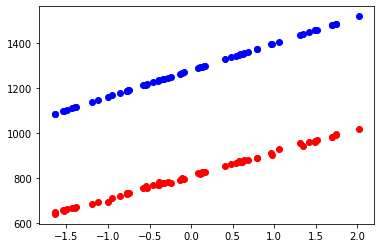

In [2]:
from matplotlib import pyplot as plt
import pandas as pd
#from LinearReg import linear_reg
from sklearn.model_selection import train_test_split

#Load Dataset
data = pd.read_csv("GOOG.csv",delimiter=',',quotechar='"')

#separating data
X=data.iloc[:,1:4]
y=data.iloc[:,-3]



from sklearn.preprocessing import StandardScaler
sc=  StandardScaler()
X=sc.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

#print(X_test)
model=linear_reg()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

z=X_test.T

#plt.plot(X_train, model.weighted*X_train+model.bias,color='g')

#Predicted values in red
plt.plot(z[2],y_pred, 'o',color='r')

plt.plot(z[2],y_test,'o',color='b')